<a href="https://colab.research.google.com/github/Zhouhun/DATA_110_FALL_2025/blob/main/Tzou_Hunter_Sleep_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/Zhouhun/DATA_110_FALL_2025/refs/heads/main/Sleep_health_and_lifestyle_dataset.csv')

## Data Set Introduction

This data set was picked from [Kaggle](https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset/data). I picked this dataset because I am interested in sleep studies and how different health and lifestlye vairables can affect sleep quality. I also saw that this data set had enough depth for me to use for this project.

### Data Dictionary

### Sleep Health and Lifestyle Dataset — Data Dictionary

| **Column Name** | **Description** |
|------------------|-----------------|
| `Person ID` | Unique identifier for each individual. |
| `Gender` | Gender of the person (`Male` or `Female`). |
| `Age` | Age of the person in years. |
| `Occupation` | Occupation or profession of the person. |
| `Sleep Duration (hours)` | Number of hours the person sleeps per day. |
| `Quality of Sleep (scale: 1-10)` | Subjective rating of sleep quality, ranging from 1 (poor) to 10 (excellent). |
| `Physical Activity Level (minutes/day)` | Number of minutes the person engages in physical activity daily. |
| `Stress Level (scale: 1-10)` | Subjective rating of stress level, ranging from 1 (low) to 10 (high). |
| `BMI Category` | Body Mass Index category (`Underweight`, `Normal`, `Overweight`). |
| `Blood Pressure (systolic/diastolic)` | Blood pressure measurement in systolic/diastolic format (e.g., 120/80). |
| `Heart Rate (bpm)` | Resting heart rate of the person, measured in beats per minute. |
| `Daily Steps` | Number of steps the person takes per day. |
| `Sleep Disorder` [^1] | Indicates whether the person has a sleep disorder (`None`, `Insomnia`, `Sleep Apnea`).|

[^1]: *Details about `Sleep Disorder` Column*:
- `None`: The individual does not exhibit any specific sleep disorder.
- `Insomnia`: The individual experiences difficulty falling asleep or staying asleep, leading to inadequate or poor-quality sleep.
- `Sleep Apnea`: The individual suffers from pauses in breathing during sleep, resulting in disrupted sleep patterns and potential health risks.

---

## Purpose

My goal with this project is to be able to analyze the different variables are related with good sleep quality. I am particularly interested in how stress and factors associates with stress affect the different the quality of sleep.

## Exploratory Data Analysis

### Check General Structure

In [37]:
df.shape

(374, 13)

In [38]:
df.head(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


All of the data types look correct to me, but it looks like there are 155 null values in `Sleep Disorder`. After looking at the csv. file, it looks like python is reading "None" as null values. I am going to try to replace them here with 'None' so I have values there. [^2]

[^2]: I learned this from ChatGPT since I did not know how to replace null values in a systematic way

In [40]:
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')

df.info() ## Check to make sure that it was actually filled

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


I want to be able to check to make sure that the Person ID column is unique otherwise I think that will cause issues down the road.

In [41]:
df['Person ID'].is_unique

True

Next I would like to see if there are duplicates in the data. Since the ID column is unique, that should mean that there are no duplicates, but it is good to check.

In [42]:
df.duplicated().sum()

np.int64(0)

### Explore Data



In [43]:
df.describe().round(2)

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.00,374.00,374.00,374.00,374.00,374.00,374.00,374.00
mean,187.50,42.18,7.13,7.31,59.17,5.39,70.17,6816.84
std,108.11,8.67,0.80,1.20,20.83,1.77,4.14,1617.92
min,1.00,27.00,5.80,4.00,30.00,3.00,65.00,3000.00
25%,94.25,35.25,6.40,6.00,45.00,4.00,68.00,5600.00
50%,187.50,43.00,7.20,7.00,60.00,5.00,70.00,7000.00
75%,280.75,50.00,7.80,8.00,75.00,7.00,72.00,8000.00
max,374.00,59.00,8.50,9.00,90.00,8.00,86.00,10000.00


It looks like

---

#### **Stress Summary**

I wanted to look into factors which indicate stress levels and I came up with the following list:
- Occupation
- Stress Level
- Heart Rate
- Blood Pressure

I wanted to put them all into a table to help me better understand how the data was distributed and what the averages were along occupational lines. I think that it is a good indicator of how we can group them since a lot of stress can come from work.<br><br>
First, I wanted to split the `Blood Pressure` column into two seperate columns and then categorize them based on their results. Right now, the blood pressure column is classed as a string/object, so I cannot use that since the blood pressure is made up of two different components `Systolic` Pressure and `Diastolic` Pressure.<br><br>
I based my categories off of the [AHA website](https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings) and specifically this chart:

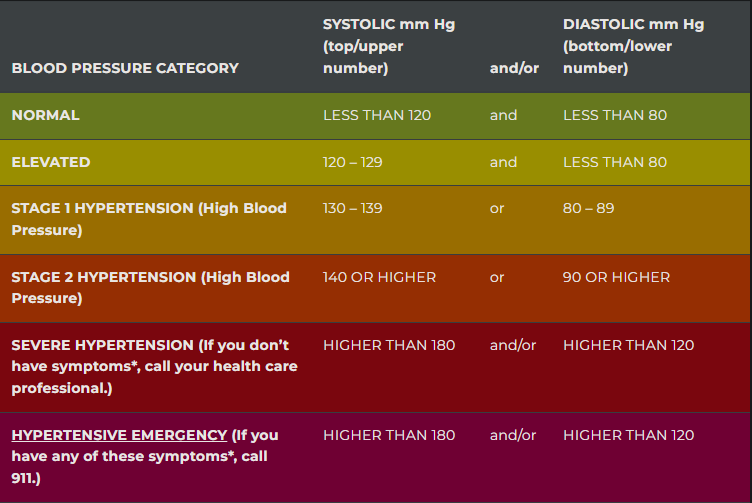

In [44]:
# I did not know how to split a string into two columns, so I asked Chat GPT to show me how.

# Split into two columns

df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True).astype(int)

# Categorize the Blood Pressure Reading

def bp_category(row):
    sys, dia = row['Systolic'], row['Diastolic']
    if sys < 120 and dia < 80:
        return 'Normal'
    elif 120 <= sys <= 129 and dia < 80:
        return 'Elevated'
    elif (130 <= sys <= 139) or (80 <= dia <= 89):
        return 'Stage 1 Hypertension'
    elif sys >= 140 or dia >= 90:
        return 'Stage 2 Hypertension'
    elif sys > 180 or dia > 120:
        return 'Hypertensive Emergency'
    else:
        return 'Unknown'

## I did not know how to apply the logic to the df and add the column, so I asked Chat GPT

df['BP Category'] = df.apply(bp_category, axis=1)

df.head(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic,BP Category
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None,126,83,Stage 1 Hypertension
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,125,80,Stage 1 Hypertension
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,125,80,Stage 1 Hypertension
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90,Stage 2 Hypertension
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90,Stage 2 Hypertension
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia,140,90,Stage 2 Hypertension
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia,140,90,Stage 2 Hypertension
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None,120,80,Stage 1 Hypertension
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None,120,80,Stage 1 Hypertension
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None,120,80,Stage 1 Hypertension


In [65]:
# Next I am creating the table to show me how the occupations stack up against one another

stress_summary = df.groupby('Occupation')[['Stress Level', 'Heart Rate', 'Systolic', 'Diastolic']].mean().round(2)

stress_summary['#'] = df['Occupation'].value_counts()
stress_summary['% of Total'] = df['Occupation'].value_counts(normalize=True) * 100

stress_summary = stress_summary.rename(columns={
    'Stress Level': 'Avg Stress Level',
    'Heart Rate': 'Avg Heart Rate'
})

stress_summary['Avg. BP Category'] = stress_summary.apply(bp_category, axis=1)

stress_summary = stress_summary[['#', '% of Total', 'Avg Stress Level', 'Avg Heart Rate', 'Systolic', 'Diastolic', 'Avg. BP Category']].round(2)

stress_summary.head(11)

,#,% of Total,Avg Stress Level,Avg Heart Rate,Systolic,Diastolic,Avg. BP Category
Occupation,,,,,,,
Accountant,37,9.89,4.59,68.86,117.73,76.92,Normal
Doctor,71,18.98,6.73,71.52,123.00,80.51,Stage 1 Hypertension
Engineer,63,16.84,3.89,67.19,125.90,81.38,Stage 1 Hypertension
Lawyer,47,12.57,5.06,69.64,129.96,85.00,Stage 1 Hypertension
Manager,1,0.27,5.00,75.00,125.00,82.00,Stage 1 Hypertension
Nurse,73,19.52,5.55,72.00,138.52,93.73,Stage 1 Hypertension
Sales Representative,2,0.53,8.00,85.00,140.00,90.00,Stage 2 Hypertension
Salesperson,32,8.56,7.00,72.00,130.00,85.00,Stage 1 Hypertension
Scientist,4,1.07,7.00,78.50,129.50,85.50,Stage 1 Hypertension


In [62]:
jobs_percent = df['Occupation'].value_counts(normalize=True) * 100
print(jobs_percent)

Occupation
Nurse                   19.518717
Doctor                  18.983957
Engineer                16.844920
Lawyer                  12.566845
Teacher                 10.695187
Accountant               9.893048
Salesperson              8.556150
Scientist                1.069519
Software Engineer        1.069519
Sales Representative     0.534759
Manager                  0.267380
Name: proportion, dtype: float64


### NOTE FOR YOU LATER

- Find out how to seperate blood pressure into a column that we can measure. Permanently alter the df

- Combine the proportion of jobs, + count + stress level
  - Iterate stress level later
  - Iterate on heart rate, and blood pressure.


- Perhaps define good quality of sleep (earlier or later)?
  - What is good quality sleep?
  - On average, are the participants getting good quality sleep?
  - How do stress levels affect sleep
